# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [52]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.service import Service
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
my_service = Service(executable_path='C:/Users/sbenn/Desktop/ASU/chromedriver.exe')

# Launch the browser
# Set up Splinter
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [54]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [55]:
# Create a Beautiful Soup Object
html = browser.html

table = BeautifulSoup(html, 'html.parser')

In [56]:
# Extract all rows of data
headers = [header.text.strip() for header in table.find_all("th")]
data_rows = table.find_all("tr")[1:]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [57]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
for row in data_rows:
    row_data = [cell.text.strip() for cell in row.find_all("td")]
    data.append(dict(zip(headers, row_data)))

In [58]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data)


In [59]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [60]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [61]:
# Change data types for data analysis

# Convert 'terrestrial_date' column to datetim
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'ls', and 'month' columns to int
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)

# Convert 'min_temp' and 'pressure' columns to float
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [62]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [122]:
# 1. How many months are there on Mars?
mars_months = df['month'].nunique()
mars_months

12

In [121]:
# 2. How many Martian days' worth of data are there?
days_total = df['sol'].count()
days_total

1867

In [65]:
# 3. What is the average low temperature by month?
avg_min_temp_mars = df.groupby('month')['min_temp'].mean()
avg_min_temp_mars


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

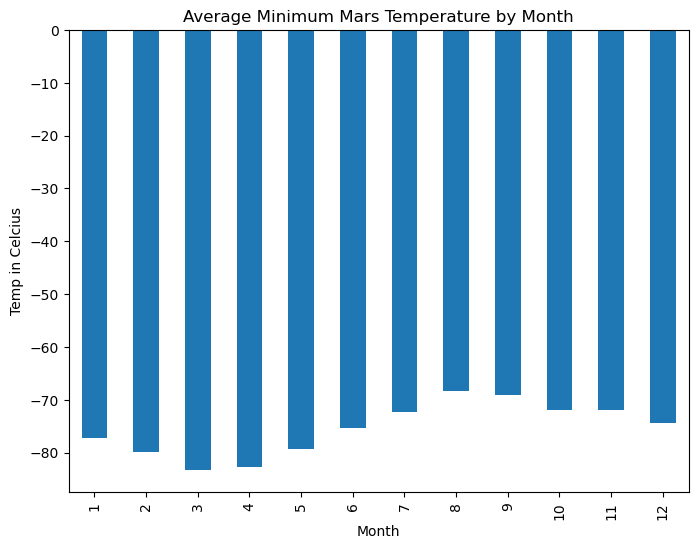

In [66]:
# Plot the average temperature by month

plt.figure(figsize=(8, 6))

#plot out the average min temps - sorted by month
avg_min_temp_mars.plot(kind='bar')

#labels and title
plt.xlabel('Month')
plt.ylabel('Temp in Celcius')
plt.title('Average Minimum Mars Temperature by Month')

#plot
plt.show()

In [67]:
sorted_temp = avg_min_temp_mars.sort_values()
sorted_temp

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

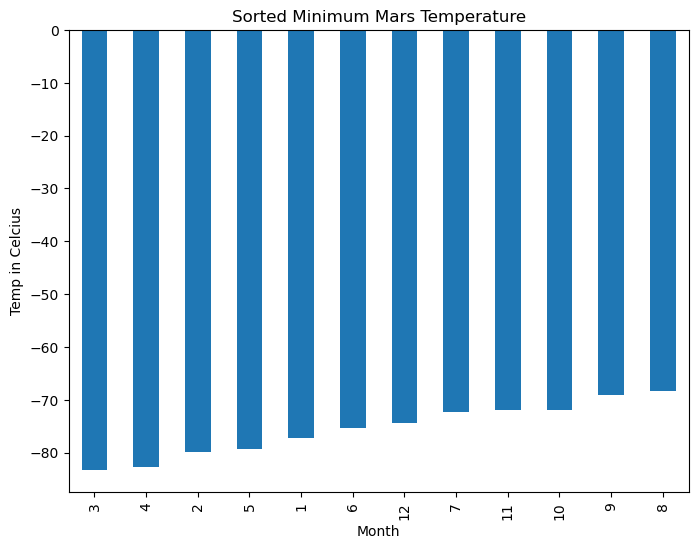

In [68]:
# Identify the coldest and hottest months in Curiosity's location

plt.figure(figsize=(8, 6))

#plot out the average min temps - sorted by coldest to hottest
avg_min_temp_mars.sort_values().plot(kind='bar')

#labels and title
plt.xlabel('Month')
plt.ylabel('Temp in Celcius')
plt.title('Sorted Minimum Mars Temperature')

#plot
plt.show()


In [69]:
# 4. Average pressure by Martian month
avg_pressure_mars = df.groupby('month')['pressure'].mean()
avg_pressure_mars


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

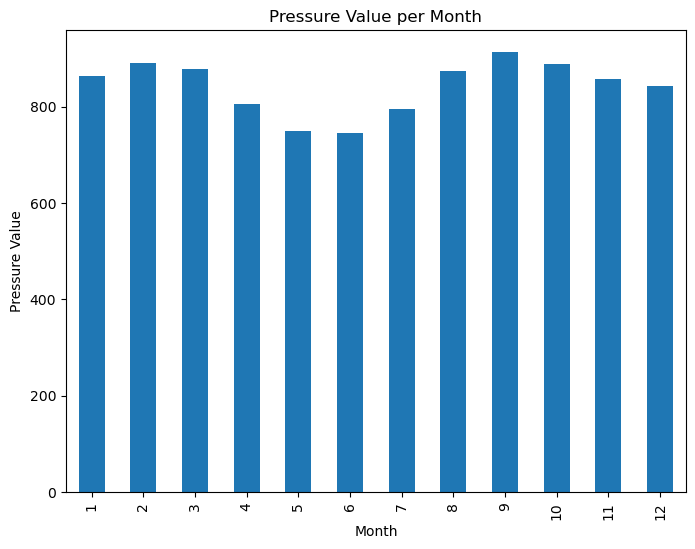

In [70]:
# Plot the average pressure by month

plt.figure(figsize=(8, 6))

#set values for x/y
avg_pressure_mars.plot(kind='bar')

#labels and title
plt.xlabel('Month')
plt.ylabel('Pressure Value')
plt.title('Pressure Value per Month')

#plot
plt.show()



In [130]:
# 5. How many terrestrial (earth) days are there in a Martian year?

#takes my original dataframe and cuts out a section of a full df['ls'] == 0 to 359 -- or in other words - a full 360 degree rotation around the sun aka a year on mars.
first_ls_1_index = df[df['ls'] == 0].index[0]

filtered_df = df.loc[first_ls_1_index:]

ls_359_index = filtered_df[filtered_df['ls'] == 359].index[0]

filtered_df = filtered_df.loc[:ls_359_index]
#filtered_df is now a 1 year segment of all mars data

#I then take the earth date min and max , take the difference value in days
min_date = filtered_df['terrestrial_date'].min()
#print(min_date)
max_date = filtered_df['terrestrial_date'].max()
#print(max_date)
difference = (max_date - min_date).days

#this nets me 685 earth days in this specific mars cycle around the sun or 1 mars year.
print(difference)

#according to google the answer is 687 - so I'm not sure why its 2 days off, but this is what the data provided me.

685


In [129]:
min_date = filtered_df['sol'].min()
#print(min_date)
max_date = filtered_df['sol'].max()
#print(max_date)
difference = (max_date - min_date)
print(difference)

#this double checked my data above - according to google there are approximately 668 martian days in a full cycle.

#again I'm 2 off just like the Earth-days total.  I'm guessing the data is not perfect?  At least its consistent.

666


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [79]:
# Write the data to a CSV
csv_file = 'Mars_data_export.csv'
df.to_csv(csv_file, index=False)

In [73]:
browser.quit()